#Desafio Tarken

Tasks:

- Count the number of Stars
- Count the number of Meteors
- If the Meteors are falling perpendicularly to the Ground (Water level), count how many will fall on the Water
- (optional) Find the phrase that is hidden in the - dots in the sky. 
  - HINT 1: 177 Characters
  - HINT 2: Most of the last tasks’ code can be reused for this one

    Please, send us the result and code you used to solve the tasks above. Explain how you achieved the results in each question. Good work!!

Subject: [CHALLENGE] [METEOR] *your name*


##Contando o número de estrelas e meteoros

Dado uma imagem 704x704 pixels, uma varredura simples na matriz RGB resolve o problema em um tempo satisfatório. Dessa forma:
  - Os meteoros possuem um valor RGB = [255,0,0]. 
  - As estrelas possuem um valor RGB = [255,255,255].

Para uma melhor visualização foi desenhado um circulo roxo em volta dos meteoros, um vermelho em volta dos meteoros que vão cair na água e um circulo preto em volta das estrelas.

Estrelas: 315
Meteoros: 328
Meteros caindo na agua: 105


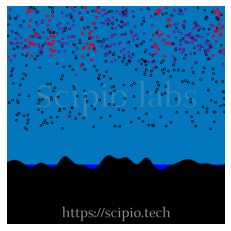

In [25]:
import cv2 #Bibliotexa usada para ler a img
import matplotlib.pyplot as plt #Biblioteca usada para visualizar as operações

img = cv2.imread("meteor_challenge_01.png")
img = cv2.cvtColor(img,cv2.COLOR_BGR2RGB) #Convertendo a matriz de BGR para RGB

m,n,cor = img.shape
#print("Altura:",m)
#print("Largura:",n)
#print("Cores:",cor)

meteoro = 0
estrela = 0
agua = 0

fig = plt.figure()
ax = fig.add_subplot(1,1,1)

#Iniciando varredula simples na matriz
for i in range(m):
    for j in range(n):
        #print(img[i][j])
        if img[i][j][0] == 255:
            if img[i][j][1] == 0 and img[i][j][2] == 0: #Testa se é um meteoro                
                meteoro = meteoro + 1
                ax.add_patch(plt.Circle((j, i), 1, color="purple", linewidth=2, fill=False)) #Circula o meteoro de roxo
                for k in range(i,704,1):
                    if img[k][j][0] == 0 and img[k][j][1] == 0 and img[k][j][2] == 255:
                        agua = agua + 1
                        ax.add_patch(plt.Circle((j, i), 1, color="red", linewidth=2, fill=False)) #Circulas o meteoro que irá cair na agua de vermelho
                        break
                    
            if img[i][j][1] == 255 and img[i][j][2] == 255: #Testa se é uma estrela
                estrela = estrela + 1
                ax.add_patch(plt.Circle((j, i), 1, color="black", linewidth=2, fill=False)) #Circula a estrela de preto

print("Estrelas:",estrela)
print("Meteoros:",meteoro)
print("Meteros caindo na agua:",agua)
ax.set_axis_off()
plt.imshow(img)
plt.show()

##Encontrando a frase escondida
Vamos investigar as colunas dessa matriz. Ou seja, vamos analisar as colunas e investigar quais elementos elas possuem.

In [108]:
colunas = []
for n in range(0,704,1):
  obj = []
  for k in range(0,704,1):
    #print(img[k][n])
    if img[k][n][0] == 255 and img[k][n][1] == 255 and img[k][n][2] == 255:
      obj.append(1) # 1 para estrela
      #print(img[k][n])
      pass
    if img[k][n][0] == 255 and img[k][n][1] == 0 and img[k][n][2] == 0:
      obj.append(0) # 0 para meteoro
      #print(img[k][n])
      pass
  colunas.append(obj)

print(colunas)

[[], [0], [0, 1], [0], [], [], [0, 1], [], [], [0, 1], [0], [0], [1], [0], [0], [0, 1], [], [0, 1], [0, 1], [1], [], [1], [], [0], [], [0], [1, 0], [0], [], [1], [0, 1], [1], [], [0, 1], [0, 1], [1], [], [0], [1], [1], [], [], [0, 1], [], [0], [0], [0], [], [], [1], [0, 1], [], [1], [1], [1], [], [], [0, 1], [1], [], [0, 1], [1], [1], [1], [], [0, 1], [0, 1], [1], [0], [0, 1], [0], [0], [], [0], [1, 0], [0], [], [0], [0], [0], [], [1], [1, 0], [], [], [], [], [1], [], [1, 0], [0, 1], [], [0], [0], [1], [0], [], [1, 0], [0, 1], [0], [1], [0, 1], [1], [0, 1], [], [0, 1], [1, 0], [1], [], [1], [0], [0, 1], [], [0, 1], [0, 1], [1], [0], [1], [], [], [], [], [0, 1], [], [], [], [], [], [], [0, 1], [0, 1], [0], [1, 0], [], [], [0], [], [1, 0], [1, 0], [], [0, 1], [0, 1], [0, 1], [0, 1], [], [0, 1], [1, 0], [1, 0], [], [0, 1], [1], [1, 0], [], [], [0, 1], [], [], [], [], [], [], [0, 1], [0, 1], [], [1], [], [0], [0], [], [0, 1], [0, 1], [], [], [], [], [0, 1], [], [0, 1], [0, 1], [1], [0], [0

Por incrível que pareça apenas os seguintes casos foram encontrados:
  - Coluna não possui meteoro ou estrela
  - Coluna possui um meteoro
  - Coluna possui uma estrela
  - Coluna possui um meteoro e uma estrela

Agora vamos investigar se existe alguma formatação possivel em binário, cujo resultado seja uma frase de 177 caracteres.

In [112]:
s = ''
c_total = 0
c_nao_vazio = 0
c_vazio = 0
for l in colunas:
  if len(l) == 0:
    c_vazio = c_vazio +1
    #s = s + ' '
  else:
    c_nao_vazio = c_nao_vazio + 1

  if len(l) == 1:    
    for o in l:
      if o == 1:
        #print("\t",o,"estrela")
        s = s + '1'
        pass
      if o == 0:
        #print("\t",o,"meteoro")      
        s = s + '0'
        pass
      pass

  if len(l) == 2:       
    for o in l:
      if o == 1:
        #print("\t",o,"estrela")
        s = s + '1'
        pass
      if o == 0:
        #print("\t",o,"meteoro")  
        s = s + '0'    
        pass
      pass

  c_total = c_total + 1

print(s)
print(len(s))
print("total:",c_total)
print("nao vazio", c_nao_vazio)
print("vazio", c_vazio)

0010010100100010101110010010110101101101000101111011011110101100100010000011011001001010010101101011011001010110101010101001010010101010110100111001010110001010101011000111010100001011110010101101010101101100101011010100100101101010111101000001010010101110000101111011110010000101000010101000110011011011001101001010110100010101100101010011001010110101100100001001100101001100110110110011011111010101101101111010001010001010110010010101101000100010111101110101011100010001011001010100010101110010000101000101010101100101001001000010110101010101001100101011001100001001011111010110101011001101010111001010101101010011101000000101001100101101101
643
total: 704
nao vazio 438
vazio 266


Nada de relevante foi encontrado...

E se a mensagem for em código morse?

In [133]:
s = ''
c_total = 0
c_nao_vazio = 0
c_vazio = 0
for l in colunas:
  if len(l) == 0:
    c_vazio = c_vazio +1
    s = s + ' '
  else:
    c_nao_vazio = c_nao_vazio + 1

  if len(l) == 1:    
    for o in l:
      if o == 1:
        #print("\t",o,"estrela")
        s = s + '.'
        pass
      if o == 0:
        #print("\t",o,"meteoro")      
        s = s + '-'
        pass
      pass

  if len(l) == 2:       
    for o in l:
      if o == 1:
        #print("\t",o,"estrela")
        s = s + '.'
        pass
      if o == 0:
        #print("\t",o,"meteoro")  
        s = s + '-'    
        pass
      pass

  c_total = c_total + 1

print(s)
s = s.split(' ')
s = list(filter(('').__ne__, s))
print(len(s))
for c in s:
  print(c," ", end = '')

print()
print("total:",c_total)
print("nao vazio", c_nao_vazio)
print("vazio", c_vazio)

 --.-  -.  -.--.---. -.-.. . - -.-- .-.. -.-.. -..  -. ---  .-. ...  -.. -.... -.-..--.-- -.-- --- ..-    . .--. --.- .--.-.-..-. -..-. .--. -.-..-.    -.      -.-.-.-  - .-.- -.-.-.-. -..-.- -...-  -.      -.-. . -- -.-.    -. -.-..---.  ..-  .   -.-- -   -.-...  .- -.-. -..-.-. -.-.. -. .-  -.      -.-. .  - .-.- -.--. -..-. -.    -. ...  -.- - -- -.- .- -. -.-.. .- - --.- ... .-..  .. --. -- - -.-. ----. -.-.- --.  .--. .-..-. .--..-.--. -.-.. -.--  -.      -.-. .--  .-.- .--..--. -.-..- .-.. --.- --- .--. .  - -.-.-  -. .--.. -.  .-.  .-   -.      .-...  . .-. -.-..-. .-.. . . -.-  -  -.-. ---.-. -..-   -.- -.-. -..-.- --.--  - .-.  ... -..  .-. -.-.. . - --. --   -.-. . -  -.-. -.---. -.-.. . -  -. ---- .-.-  --. -.-.-.-..- -.-. --.   --.- --  -.-. .-.-. -.-.- .--. .--.- .- . .--.. - - --.-  -  .-. .. . .-.-..-.-. -..--. .-.  -.-. .  .- -.-. -.-..  -.-. --... -.- ---- -.-. --..-  -.-. .-..-.
180
--.-  -.  -.--.---.  -.-..  .  -  -.--  .-..  -.-..  -..  -.  ---  .-.  ...  -..  -...

Encontrei uma frase em morse com 180 caracteres, que ainda não é o buscado (177). E mesmo assim, a frase nao possui nenhum sentido.

Vamos tentar analisar a imagem na horizontal, ou seja, ao inves de pegar as colunas, vamos pegar as linhas.

In [135]:
linhas = []
for n in range(0,704,1):
  obj = []
  for k in range(0,704,1):
    #print(img[0][k])
    if img[n][k][0] == 255 and img[n][k][1] == 255 and img[n][k][2] == 255:
      obj.append(1) # 1 para estrela
      pass
    if img[n][k][0] == 255 and img[n][k][1] == 0 and img[n][k][2] == 0:
      obj.append(0) # 0 para meteoro
      pass
  linhas.append(obj)

s = ''
c_total = 0
c_nao_vazio = 0
c_vazio = 0
for l in linhas:
  if len(l) == 0:
    c_vazio = c_vazio +1
    s = s + ' '
  else:
    c_nao_vazio = c_nao_vazio + 1

  if len(l) == 1:    
    for o in l:
      if o == 1:
        #print("\t",o,"estrela")
        s = s + '.'
        pass
      if o == 0:
        #print("\t",o,"meteoro")      
        s = s + '-'
        pass
      pass

  if len(l) == 2:       
    for o in l:
      if o == 1:
        #print("\t",o,"estrela")
        s = s + '.'
        pass
      if o == 0:
        #print("\t",o,"meteoro")  
        s = s + '-'    
        pass
      pass

  c_total = c_total + 1

print(s)
s = s.split(' ')
s = list(filter(('').__ne__, s))
print(len(s))
for c in s:
  print(c," ", end = '')

print()
print("total:",c_total)
print("nao vazio", c_nao_vazio)
print("vazio", c_vazio)


..............--...--....--..... ........--...........-....-..-.........-.......--......--..--....--.--......---. -........ ---..--..--.-- ...-... .--.... ..--... ...... .-.. ...  .--..... ..    . ...   .  .....    ... .... ... . . .  .  .   .   ..   ..  ..... .  ..  ....... .  .... .  ...  ..  .  .. ..... .. ..   ..... ..  .. .. .........   .. . .........     ..... .  . .. .                                                                                                                                                                                                                                                                                                                 
54
..............--...--....--.....  ........--...........-....-..-.........-.......--......--..--....--.--......---.  -........  ---..--..--.--  ...-...  .--....  ..--...  ......  .-..  ...  .--.....  ..  .  ...  .  .....  ...  ....  ...  .  .  .  .  .  .  ..  ..  .....  .  ..  .......  .  ....  .  ...  ..  .  .. 

Sinto que estou ainda mais distante da frase oculta.

##Conclusão

Para realizar a contagem das estrelas e dos meteoros foram usadas operações na matriz de pixels da imagem. Para este problema não houve necessidade de elaborar operações complexas a fim de minimizar o tempo do algoritmo, uma vez que a matriz referente a imagem era relativamente pequena. Assim foi feita uma varredura simples na matriz para encontrar e contar os elementos relevantes.

- **Estrelas**: 315
- **Meteoros**: 328
- **Meteros caindo na agua**: 105

Sobre a questão opcional, onde o objetivo é encontrar a frase oculta, não foi encontrada. Deixei explicitado acima o meu raciocínio ao tentar encontra-la investigando código binário e código morse.